In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from construct import *
import scipy.signal

import ccsds
import tianwen1_tm

import struct
import collections

In [2]:
def get_timestamps(aos):
    return np.array([tianwen1_tm.parse_timestamp_datetime64(a.insert_zone.timestamp) for a in aos])

In [3]:
frame_size = 220
frames = np.fromfile('tianwen1_frames-20200920.u8', dtype = 'uint8')
frames = frames[:frames.size//frame_size*frame_size].reshape((-1, frame_size))
frames.shape[0]

55352

In [4]:
aos = [ccsds.AOSFrame.parse(f) for f in frames]

In [5]:
collections.Counter([a.primary_header.spacecraft_id for a in aos])

Counter({82: 13018,
         245: 42325,
         218: 1,
         8: 1,
         33: 1,
         58: 1,
         183: 1,
         233: 1,
         197: 1,
         43: 1,
         71: 1})

In [6]:
collections.Counter([a.primary_header.virtual_channel_id for a in aos
                     if a.primary_header.spacecraft_id == 245])

Counter({1: 27675, 4: 137, 3: 14513})

In [7]:
collections.Counter([a.primary_header.virtual_channel_id for a in aos
                     if a.primary_header.spacecraft_id == 82])

Counter({1: 13018})

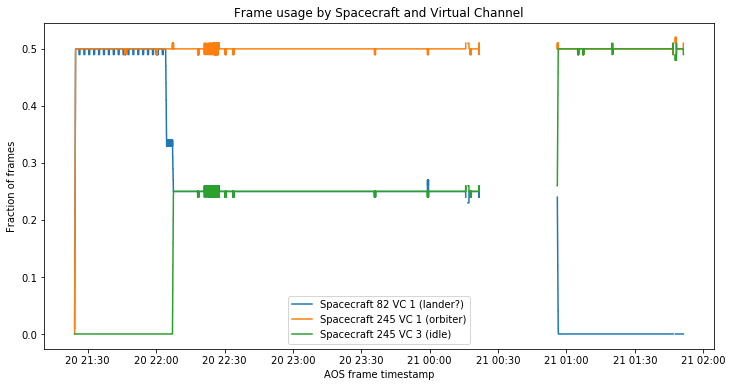

In [8]:
vcid3 = np.array([a.primary_header.spacecraft_id == 245 and a.primary_header.virtual_channel_id == 3 for a in aos])
vcid1 = np.array([a.primary_header.spacecraft_id == 245 and a.primary_header.virtual_channel_id == 1 for a in aos])
sc85 = np.array([a.primary_header.spacecraft_id == 82 for a in aos])

t = get_timestamps([a for a in aos if
                   a.primary_header.spacecraft_id == 245 and a.primary_header.virtual_channel_id == 1 ])
s = (t - t[0])/np.timedelta64(1, 's')
tt = t[0] + (np.interp(np.arange(len(aos)), np.arange(len(aos))[vcid1], s) * 1e9) * np.timedelta64(1, 'ns')

N = 100
plt.figure(figsize = (12,6), facecolor = 'w')
jump = (tt[1:] - tt[:-1]) > np.timedelta64(10, 's')
for y in (sc85, vcid1, vcid3):
    dat = np.convolve(y, np.ones(N)/N)[:-N+1]
    dat[1:][jump] = np.nan
    plt.plot(tt, dat)
plt.legend(['Spacecraft 82 VC 1 (lander?)', 'Spacecraft 245 VC 1 (orbiter)', 'Spacecraft 245 VC 3 (idle)'])
plt.xlabel('AOS frame timestamp')
plt.ylabel('Fraction of frames')
plt.title('Frame usage by Spacecraft and Virtual Channel');

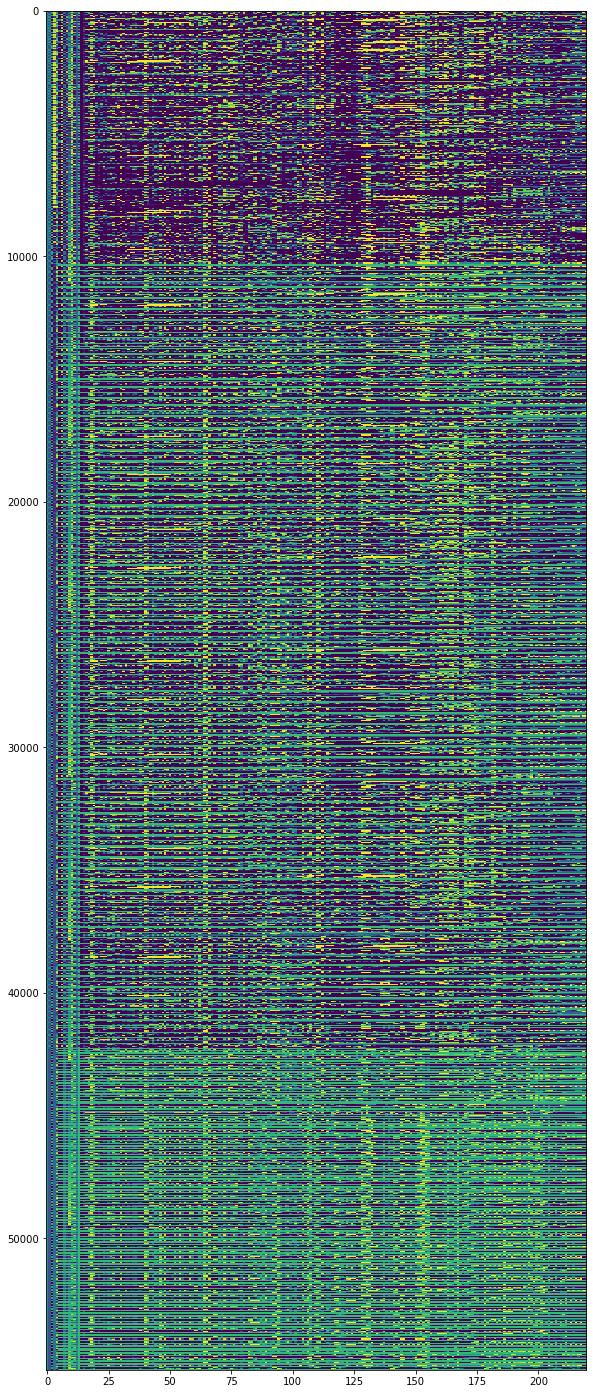

In [9]:
plt.figure(figsize = (25,25), facecolor = 'w')
plt.imshow(frames, aspect = 0.01)

In [10]:
[(a.primary_header.spacecraft_id, a.primary_header.virtual_channel_id) for a in aos[:10]]

[(82, 1),
 (245, 1),
 (82, 1),
 (245, 1),
 (82, 1),
 (245, 1),
 (82, 1),
 (245, 1),
 (82, 1),
 (245, 1)]

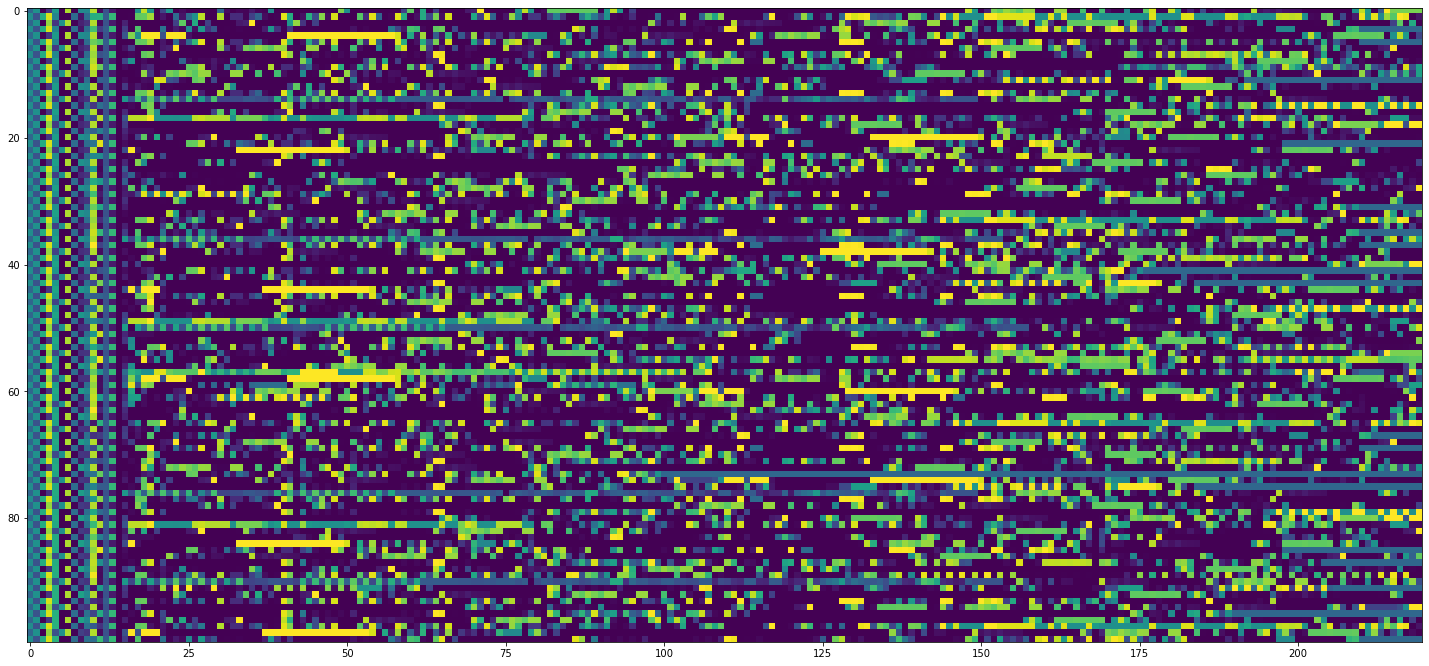

In [11]:
plt.figure(figsize = (25,25), facecolor = 'w')
plt.imshow(frames[:100], aspect = 1)

In [12]:
[(a.primary_header.spacecraft_id, a.primary_header.virtual_channel_id) for a in aos[20000:][:20]]

[(245, 3),
 (245, 1),
 (82, 1),
 (245, 1),
 (245, 3),
 (245, 1),
 (82, 1),
 (245, 1),
 (245, 3),
 (245, 1),
 (82, 1),
 (245, 1),
 (245, 3),
 (245, 1),
 (82, 1),
 (245, 1),
 (245, 3),
 (245, 1),
 (82, 1),
 (245, 1)]

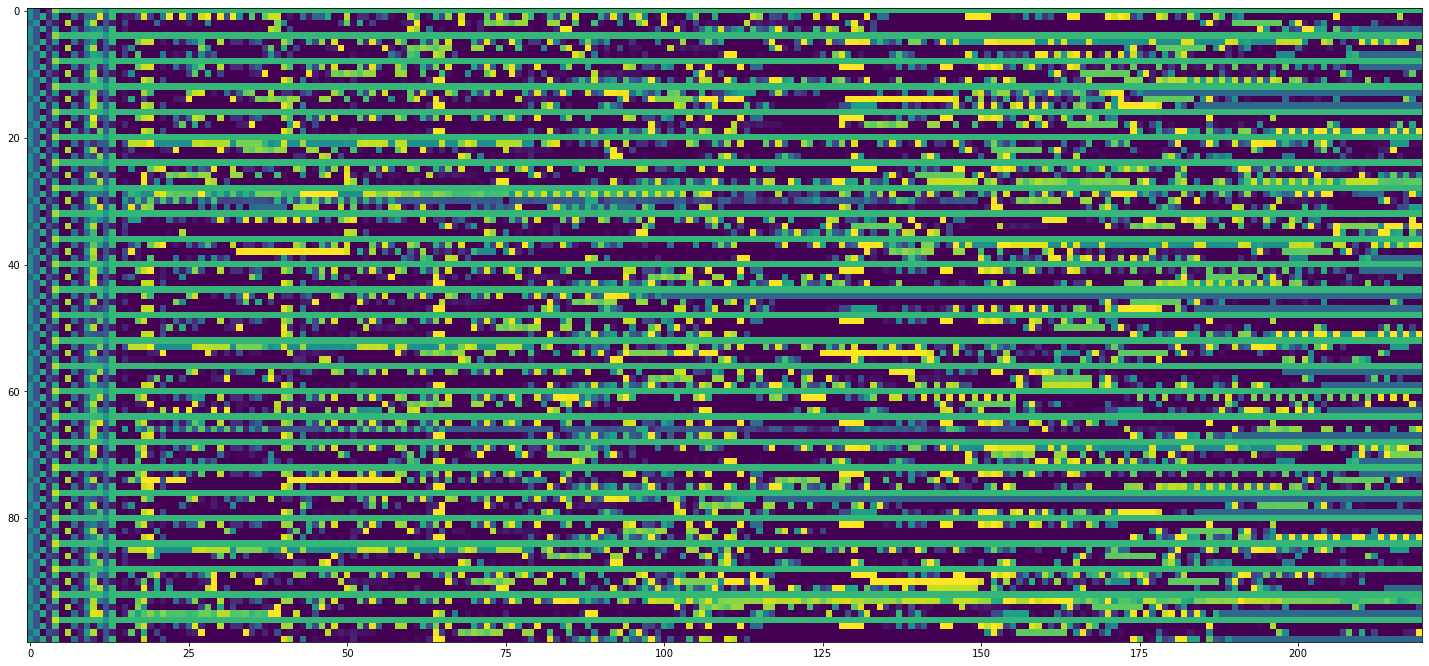

In [13]:
plt.figure(figsize = (25,25), facecolor = 'w')
plt.imshow(frames[20000:][:100], aspect = 1)

In [14]:
[(a.primary_header.spacecraft_id, a.primary_header.virtual_channel_id) for a in aos[50000:][:20]]

[(245, 3),
 (245, 1),
 (245, 3),
 (245, 1),
 (245, 3),
 (245, 1),
 (245, 3),
 (245, 1),
 (245, 3),
 (245, 1),
 (245, 3),
 (245, 1),
 (245, 3),
 (245, 1),
 (245, 3),
 (245, 1),
 (245, 3),
 (245, 1),
 (245, 3),
 (245, 1)]

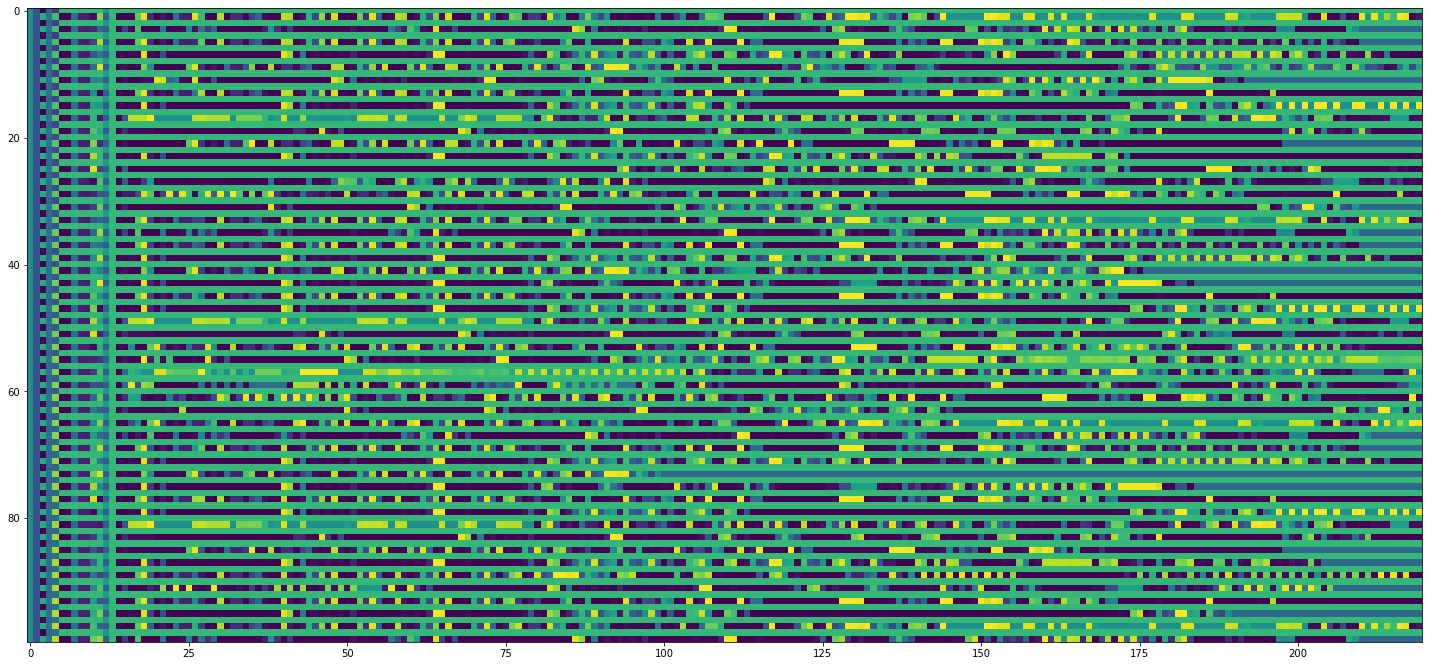

In [15]:
plt.figure(figsize = (25,25), facecolor = 'w')
plt.imshow(frames[50000:][:100], aspect = 1)

In [16]:
[a.primary_header for a in aos[:20] if a.primary_header.spacecraft_id == 82]

[Container(transfer_frame_version_number=1, spacecraft_id=82, virtual_channel_id=1, virtual_channel_frame_count=75658, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=82, virtual_channel_id=1, virtual_channel_frame_count=54823, replay_flag=True, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=82, virtual_channel_id=1, virtual_channel_frame_count=75659, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=82, virtual_channel_id=1, virtual_channel_frame_count=54824, replay_flag=True, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=82, virtual_channel_id=1, virtual_channel_frame_count=75660, replay_flag=False, vc_frame_count_usage_flag=Fa

In [17]:
[a.primary_header for a in aos[20000:][:20] if a.primary_header.spacecraft_id == 82]

[Container(transfer_frame_version_number=1, spacecraft_id=82, virtual_channel_id=1, virtual_channel_frame_count=80658, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=82, virtual_channel_id=1, virtual_channel_frame_count=80659, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=82, virtual_channel_id=1, virtual_channel_frame_count=80660, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=82, virtual_channel_id=1, virtual_channel_frame_count=80661, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=82, virtual_channel_id=1, virtual_channel_frame_count=80662, replay_flag=False, vc_frame_count_usage_flag=